In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
import plotly.express as px # or data visualizations

warnings.filterwarnings('ignore') # Ignore warning messages

C:\Users\chait\AppData\Local\Temp\ipykernel_27444\1918853399.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [6]:
# Load the Netflix dataset into a DataFrame
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,data_released,release_year,rating,duration,plot,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
##check the columns name
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'data_released', 'release_year', 'rating', 'duration', 'plot',
       'description', 'year', 'duration_hours', 'genre'],
      dtype='object')

In [38]:
#Checking the data shape
print(f'The dataset contains {netflix_data.shape[0]} rows and {netflix_data.shape[1]} columns')

The dataset contains 8807 rows and 15 columns


In [39]:
#information about the dataset
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        6173 non-null   object        
 4   cast            7982 non-null   object        
 5   country         7976 non-null   object        
 6   data_released   8797 non-null   object        
 7   release_year    8807 non-null   datetime64[ns]
 8   rating          8803 non-null   object        
 9   duration        8804 non-null   object        
 10  plot            8807 non-null   object        
 11  description     8807 non-null   object        
 12  year            8807 non-null   int32         
 13  duration_hours  8804 non-null   float64       
 14  genre           8807 non-null   object        
dtypes: d

In [40]:
# Checking the null values in the dataset
netflix_data.isna().sum()

show_id              0
type                 0
title                0
director          2634
cast               825
country            831
data_released       10
release_year         0
rating               4
duration             3
plot                 0
description          0
year                 0
duration_hours       3
genre                0
dtype: int64

In [41]:
# Remove missing values from the DataFrame
netflix=netflix_data.dropna()

# After removing missing values, check the data shape
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 15 columns


In [42]:
# Checking the duplicate values in the data
duplicate_values=netflix_data.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


DISTRIBUTION OF CONTENT RATINGS ON NETFLIX

In [7]:
# Grouping by 'rating' column and counting the occurrences
rating_counts = netflix_data['rating'].value_counts().reset_index()

# Renaming columns for clarity
rating_counts.columns = ['rating', 'count']

# Creating a pie chart using Plotly Express
pie_chart = px.pie(rating_counts, values='count', names='rating',title='Distribution of Content Ratings on Netflix',color_discrete_sequence=px.colors.qualitative.Set3)
pie_chart.show()

TOP 5 DIRECTORS ON NETFLIX


In [13]:
# Assuming 'dff' is your DataFrame and 'director' is one of the column names
netflix_data['director'] = netflix_data['director'].fillna('No Director Specified')

# Splitting directors and stacking them into rows
filtered_directors = netflix_data['director'].str.split(',', expand=True).stack()
filtered_directors = filtered_directors.to_frame()
filtered_directors.columns = ['Director']

# Grouping by director and counting the number of content for each director
directors = filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')

# Excluding 'No Director Specified' entry
directors = directors[directors.Director != 'No Director Specified']

# Sorting directors by the total content in descending order
directors = directors.sort_values(by=['Total Content'], ascending=False)

# Taking the top 5 directors
directorsTop5 = directors.head()

# Sorting top 5 directors by total content in ascending order for visualization
directorsTop5 = directorsTop5.sort_values(by=['Total Content'])

# Creating a bar chart using Plotly Express
fig1 = px.bar(directorsTop5, x='Total Content', y='Director', 
              title='Top 5 Directors on Netflix', 
              labels={'Total Content': 'Total Content', 'Director': 'Director'})
fig1.show()

ANALYZING CONTENT ON NETFLIX

In [14]:
df1=netflix_data[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

ANALYZING SENTIMENT OF CONTENT ON NETFLIX

In [18]:
from textblob import TextBlob
dfx=netflix_data[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

DISTRIBUTION BY COUNTRIES

TREND ANALYSIS

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

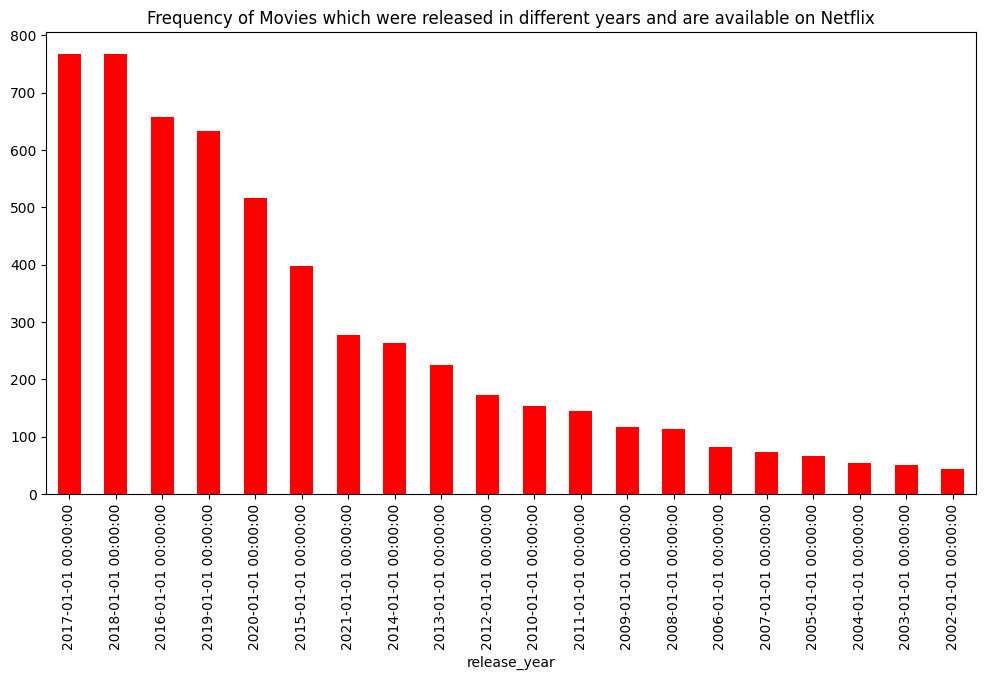

In [33]:
plt.figure(figsize=(12,6))
netflix_data[netflix_data["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

USER BEHAVIOR

<Axes: title={'center': 'Distribution of Viewing Duration'}, xlabel='Viewing Duration (hours)', ylabel='Frequency'>

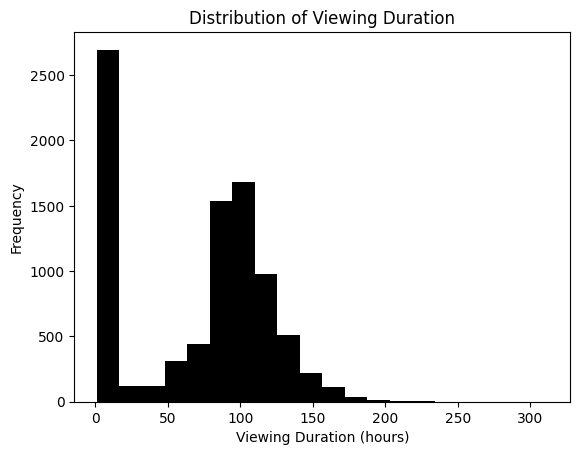

In [31]:

netflix_data['duration_hours'] = netflix_data['duration'].str.extract('(\d+)').astype(float)
netflix_data['duration_hours'].plot(kind='hist', bins=20, xlabel='Viewing Duration (hours)', ylabel='Frequency', title='Distribution of Viewing Duration', color='black')

DISTRIBUTION OF TYPE

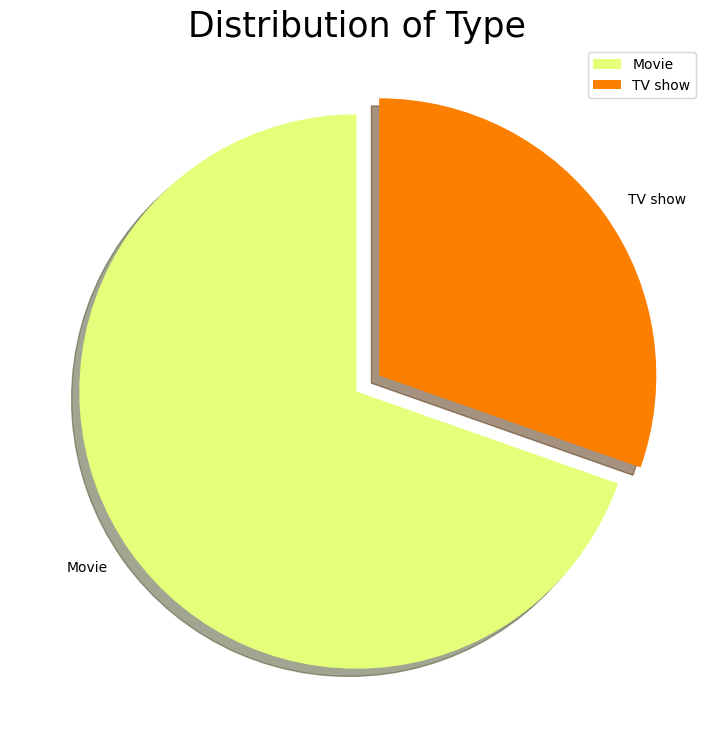

In [43]:
labels = ['Movie', 'TV show']
size = netflix_data['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()